<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-Keras-and-mnist-example-data" data-toc-modified-id="Import-Keras-and-mnist-example-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import Keras and mnist example data</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Prepare-data" data-toc-modified-id="Prepare-data-1.0.1"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>Prepare data</a></span></li></ul></li></ul></li><li><span><a href="#Small-feed-forward-neural-network" data-toc-modified-id="Small-feed-forward-neural-network-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Small feed-forward neural network</a></span><ul class="toc-item"><li><span><a href="#Relu-function" data-toc-modified-id="Relu-function-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Relu function</a></span></li><li><span><a href="#Stochastic-gradient-descent" data-toc-modified-id="Stochastic-gradient-descent-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Stochastic gradient descent</a></span></li><li><span><a href="#Backpropagation" data-toc-modified-id="Backpropagation-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Backpropagation</a></span></li><li><span><a href="#Compile-and-train-neural-network" data-toc-modified-id="Compile-and-train-neural-network-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Compile and train neural network</a></span></li><li><span><a href="#Test" data-toc-modified-id="Test-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Test</a></span></li></ul></li><li><span><a href="#Convolutional-neural-network" data-toc-modified-id="Convolutional-neural-network-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Convolutional neural network</a></span><ul class="toc-item"><li><span><a href="#Idea:-(convolutional-+-pooling)-+-(RELU-+-softmax)-layers" data-toc-modified-id="Idea:-(convolutional-+-pooling)-+-(RELU-+-softmax)-layers-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Idea: (convolutional + pooling) + (RELU + softmax) layers</a></span><ul class="toc-item"><li><span><a href="#Convolution-layer" data-toc-modified-id="Convolution-layer-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Convolution layer</a></span></li><li><span><a href="#Pooling-layer" data-toc-modified-id="Pooling-layer-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Pooling layer</a></span></li></ul></li><li><span><a href="#Creating-network" data-toc-modified-id="Creating-network-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Creating network</a></span></li><li><span><a href="#Prepare-data" data-toc-modified-id="Prepare-data-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Prepare data</a></span></li><li><span><a href="#Training-network" data-toc-modified-id="Training-network-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Training network</a></span></li><li><span><a href="#Checking-on-test-set" data-toc-modified-id="Checking-on-test-set-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Checking on test set</a></span><ul class="toc-item"><li><span><a href="#Plot-accuracy" data-toc-modified-id="Plot-accuracy-3.5.1"><span class="toc-item-num">3.5.1&nbsp;&nbsp;</span>Plot accuracy</a></span></li></ul></li></ul></li><li><span><a href="#Links-to-original-websites-and-examples" data-toc-modified-id="Links-to-original-websites-and-examples-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Links to original websites and examples</a></span></li></ul></div>

# Import Keras and mnist example data

In [104]:
import warnings
warnings.filterwarnings('ignore')

#for plotting
import matplotlib.pyplot as plt

from keras.utils import to_categorical
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

import keras
keras.__version__

'2.2.5'

Import MNIST data from Keras

In [106]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Look at data properties

In [107]:
train_images.shape

(60000, 28, 28)

In [108]:
len(train_labels)

60000

In [109]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

4


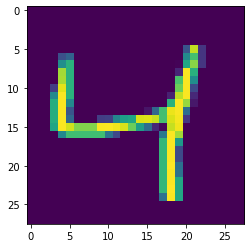

In [110]:
plt.imshow(train_images[2])
print(train_labels[2])

Test data

In [111]:
test_images.shape

(10000, 28, 28)

In [112]:
len(test_labels)

10000

### Prepare data

In [113]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [114]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Small feed-forward neural network

In [115]:
from keras import models
from keras import layers

network = models.Sequential()
# add one layer
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
#one more layer - test the effect
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

## Relu function

output = relu(dot(W, input) + b);

relu(x) = max(x, 0).

attributes: W - kernel, b - bias

## Stochastic gradient descent

1. Calculate loss of predicted y values for random batch of data.

  loss_value = loss(y_predicted, y)

2. Compute the gradient of the loss with regard to the network’s parameters (a backward pass)

3. Move the parameters a little in the opposite direction from the gradient

## Backpropagation

Optimizes weight for many layers using chain rule for derivative:

 f(g(x)) = f'(g(x)) * g'(x) 

## Compile and train neural network

In [116]:
network.compile(optimizer='rmsprop', 
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [118]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 9s 150us/step - loss: 0.2215 - acc: 0.9325
Epoch 2/5
60000/60000 [==============================] - 9s 144us/step - loss: 0.0807 - acc: 0.9751
Epoch 3/5
60000/60000 [==============================] - 9s 145us/step - loss: 0.0547 - acc: 0.9831
Epoch 4/5
60000/60000 [==============================] - 9s 143us/step - loss: 0.0377 - acc: 0.9883
Epoch 5/5
60000/60000 [==============================] - 10s 161us/step - loss: 0.0294 - acc: 0.9910


## Test

In [65]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 83us/step


In [66]:
print('test_acc:', test_acc)

test_acc: 0.983


# Convolutional neural network

## Idea: (convolutional + pooling) + (RELU + softmax) layers 

![SegmentLocal](image-con-net.jpeg "segment")

### Convolution layer

The idea is to extract the high-level features such as edges from the input image.

![SegmentLocal](conv-layer.gif "segment")

Image pixel values are multiplied by fixed matrix - Kernel, and the sum is inserted into new matrix.

### Pooling layer

![SegmentLocal](pooling-layer.jpg)

We will use max pooling algoritm.

## Creating network

In [159]:
batch_size = 64
epochs = 5
num_classes = 10

In [164]:
conv_network = Sequential()

conv_network.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1),padding='same'))
conv_network.add(LeakyReLU(alpha=0.1))
conv_network.add(MaxPooling2D((2, 2),padding='same'))

#add as many layers as needed
'''
conv_network.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
conv_network.add(LeakyReLU(alpha=0.1))
conv_network.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

conv_network.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
conv_network.add(LeakyReLU(alpha=0.1))                  
conv_network.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
'''
conv_network.add(Flatten())
conv_network.add(Dense(32, activation='linear'))
#conv_network.add(Dense(128, activation='linear'))
conv_network.add(LeakyReLU(alpha=0.1))                  
conv_network.add(Dense(num_classes, activation='softmax'))

Compile

In [165]:
conv_network.compile(loss=keras.losses.categorical_crossentropy, 
                     optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

Some information about network

In [166]:
conv_network.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_27 (LeakyReLU)   (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_34 (Dense)             (None, 32)                200736    
_________________________________________________________________
leaky_re_lu_28 (LeakyReLU)   (None, 32)                0         
_________________________________________________________________
dense_35 (Dense)             (None, 10)              

## Prepare data

In [147]:
(train_X, train_Y), (test_X, test_Y) = mnist.load_data()

In [148]:
train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)
print(train_X.shape, test_X.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [149]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.

Change labels to one hot encoding

In [150]:
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

('Original label:', 9)

('After conversion to one-hot:', array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]))

In [151]:
from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

## Training network

In [167]:
conv_network_train = conv_network.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,
                                      verbose=1,validation_data=(valid_X, valid_label))

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 24s 505us/step - loss: 0.2394 - acc: 0.9316 - val_loss: 0.1035 - val_acc: 0.9698
Epoch 2/5
48000/48000 [==============================] - 25s 518us/step - loss: 0.0781 - acc: 0.9772 - val_loss: 0.0818 - val_acc: 0.9744
Epoch 3/5
48000/48000 [==============================] - 26s 539us/step - loss: 0.0544 - acc: 0.9837 - val_loss: 0.0717 - val_acc: 0.9772
Epoch 4/5
48000/48000 [==============================] - 26s 538us/step - loss: 0.0433 - acc: 0.9865 - val_loss: 0.0656 - val_acc: 0.9808
Epoch 5/5
48000/48000 [==============================] - 26s 539us/step - loss: 0.0343 - acc: 0.9899 - val_loss: 0.0749 - val_acc: 0.9791


## Checking on test set

In [168]:
test_eval = conv_network.evaluate(test_X, test_Y_one_hot)

10000/10000 [==============================] - 2s 170us/step


In [169]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.06046851386446506
Test accuracy: 0.9801


### Plot accuracy 

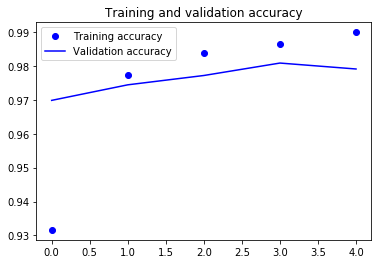

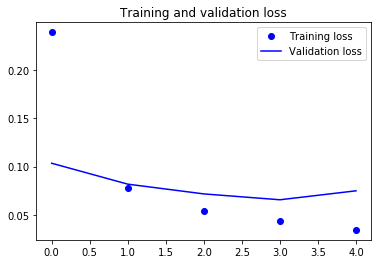

In [170]:
accuracy = conv_network_train.history['acc']
val_accuracy = conv_network_train.history['val_acc']
loss = conv_network_train.history['loss']
val_loss = conv_network_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# Links to original websites and examples

https://www.datacamp.com/community/tutorials/convolutional-neural-networks-python

https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53

Book: Deep Learning with Python